## **Import Library**

In [37]:
# Install gdown
!pip install --upgrade gdown

# load folder/file
import os
import glob

# List file dalam folder kerja colab
os.listdir()

# Import library utama
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import math

## **Load Data**

In [38]:
# Load semua isi folder curah hujan 2013-2024
!gdown --folder https://drive.google.com/drive/folders/1eFDrUPixpysf1pg6uiQycjZj4CMIVKQ_?usp=drive_link

Retrieving folder contents
Processing file 128hNIurvkVhRSKutEZSAtKjGSiU4quKW Banyaknya Curah Hujan, 2013.csv
Processing file 1WoovqfonHxhXdwSGDLsEpWZggex5ZUEv Banyaknya Curah Hujan, 2014.csv
Processing file 1_9OtmqQKE5XIvnkB7-YcoZTDLdsA_8gj Banyaknya Curah Hujan, 2015.csv
Processing file 1MFtRzKT4wfKFmaN3oOUgmNW2mgZpjM7V Banyaknya Curah Hujan, 2016.csv
Processing file 1ZZot0LhZ6t5O7Q9pLNHCIqgteWfOuGXh Banyaknya Curah Hujan, 2017.csv
Processing file 1j333y87RnSSlnSP81xsr_SntX94e9CFD Banyaknya Curah Hujan, 2018.csv
Processing file 1FejMYvhYowP7FsU926CwXGQtLDwdfQHg Banyaknya Curah Hujan, 2019.csv
Processing file 1mxKplE6idq79asaquaKDHI2N8Oy16gbC Banyaknya Curah Hujan, 2020.csv
Processing file 1lrHSECqmq1eR4lD78uvccWbVsrQxtMkL Banyaknya Curah Hujan, 2021.csv
Processing file 1ZvS_mHIQojFOhBNdVEc-KZQOeEcp94sl Banyaknya Curah Hujan, 2022.csv
Processing file 1i_IRnC3y3Uj5EseFmHwdNdV2x4NqApbA Banyaknya Curah Hujan, 2023.csv
Processing file 1Eqrkep2vZQnBNS2_-30W6fZmMgwxHfM5 Banyaknya Curah Hujan

**Menggabungkan Data 2013-2024**

In [39]:
# Ambil semua file CSV di folder hasil download
all_files = glob.glob(os.path.join("Dataset Curah Hujan", "*.csv"))

# Gabungkan semua file ke dalam satu dataframe
df_list = []
for file in all_files:
  year = int(file.split(',')[-1].split('.')[0].strip())
  df_temp = pd.read_csv(file, skiprows=2)
  df_temp['Tahun'] = year
  df_list.append(df_temp)

# Satukan semua dataframe
df = pd.concat(df_list, ignore_index=True)

# Simpan jadi satu file CSV
df.to_csv("Data_Curah_Hujan_Kendal_GabunganAwal.csv", index=False)

# Cek hasil
df.head(14)

,Unnamed: 0,Kendal,Weleri,Kaliwungu,Boja,Sukorejo,rata-rata,Tahun
0,NaN,2023,2023,2023,2023,2023,2023,2023
1,Januari,254,217,284,510,383,330,2023
2,Februari,275,333,377,327,500,362,2023
3,Maret,191,201,135,320,223,214,2023
4,April,58,77,69,383,301,178,2023
5,Mei,132,65,80,192,129,120,2023
6,Juni,73,32,38,23,54,44,2023
7,Juli,-,6,10,55,56,25,2023
8,Agustus,-,-,-,-,-,-,2023
9,September,-,-,-,-,-,-,2023


**Merapihkan Kolom dan menambah kolom number_num**

In [40]:
# Baca data hasil gabungan
df = pd.read_csv("Data_Curah_Hujan_Kendal_GabunganAwal.csv")

# rapikan kolom
df = df.rename(columns={
    df.columns[0]: "Bulan dan Jumlah",
    df.columns[1]: "Kendal",
    df.columns[2]: "Weleri",
    df.columns[3]: "Kaliwungu",
    df.columns[4]: "Boja",
    df.columns[5]: "Sukorejo",
    df.columns[6]: "rata-rata",
    df.columns[7]: "Tahun"
})

# Mapping bulan ke angka
bulan_order = {
    "Januari": 1, "Februari": 2, "Maret": 3, "April": 4,
    "Mei": 5, "Juni": 6, "Juli": 7, "Agustus": 8,
    "September": 9, "Oktober": 10, "November": 11, "Desember": 12
}

# Tambahkan kolom bulan_num untuk mempermudah analisis
df["Bulan_num"] = df["Bulan dan Jumlah"].map(bulan_order)

# Lihat kolom dan beberapa data awal
print(df.columns)
df.head(14)

Index(['Bulan dan Jumlah', 'Kendal', 'Weleri', 'Kaliwungu', 'Boja', 'Sukorejo',
       'rata-rata', 'Tahun', 'Bulan_num'],
      dtype='object')


,Bulan dan Jumlah,Kendal,Weleri,Kaliwungu,Boja,Sukorejo,rata-rata,Tahun,Bulan_num
0,NaN,2023,2023,2023,2023,2023,2023,2023,NaN
1,Januari,254,217,284,510,383,330,2023,1.0
2,Februari,275,333,377,327,500,362,2023,2.0
3,Maret,191,201,135,320,223,214,2023,3.0
4,April,58,77,69,383,301,178,2023,4.0
5,Mei,132,65,80,192,129,120,2023,5.0
6,Juni,73,32,38,23,54,44,2023,6.0
7,Juli,-,6,10,55,56,25,2023,7.0
8,Agustus,-,-,-,-,-,-,2023,8.0
9,September,-,-,-,-,-,-,2023,9.0


**Mengurutkan data berdasarkan tahun dan bulan**

In [41]:
# Pisahkan bulanan dan total
df_bulanan = df.dropna(subset=["Bulan_num"]).copy()
df_total   = df[df["Bulan dan Jumlah"].str.contains("Total", case=False, na=False)].copy()

# Susun ulang per tahun
final_list = []
for tahun in sorted(df_bulanan["Tahun"].unique()):
    data_tahun = df_bulanan[df_bulanan["Tahun"] == tahun].sort_values("Bulan_num")
    total_tahun = df_total[df_total["Tahun"] == tahun]
    # gabungkan: bulan + total (total selalu setelah desember)
    data_gabung = pd.concat([data_tahun, total_tahun], ignore_index=True)
    final_list.append(data_gabung)

df_final = pd.concat(final_list, ignore_index=True)

# Simpan hasil akhir
df_final.to_csv("Data_Curah_Hujan_Kendal_GabunganAkhir.csv", index=False)

# Cek hasil
df_final.head (144)

,Bulan dan Jumlah,Kendal,Weleri,Kaliwungu,Boja,Sukorejo,rata-rata,Tahun,Bulan_num
0,Januari,621,568,487,526,454,531,2013,1.0
1,Februari,254,357,172,428,486,339,2013,2.0
2,Maret,100,106,50,633,512,280,2013,3.0
3,April,138,109,142,663,358,282,2013,4.0
4,Mei,85,163,84,208,252,158,2013,5.0
...,...,...,...,...,...,...,...,...,...
139,Oktober,35,10,38,23,17,25,2023,10.0
140,November,124,16,207,265,149,152,2023,11.0
141,Desember,98,125,249,524,322,264,2023,12.0
142,Total,1240,1082,1487,2622,2134,143,2023,NaN


## **Data Preprocessing & Cleaning**

In [42]:
# hapus baris "Total" karena hasil penjumlahan, bukan data bulanan asli
df_bulanan = df_final[df_final["Bulan dan Jumlah"] != "Total"].copy()

# cek apakah sudah terhapus
df_bulanan.head(13)

,Bulan dan Jumlah,Kendal,Weleri,Kaliwungu,Boja,Sukorejo,rata-rata,Tahun,Bulan_num
0,Januari,621,568,487,526,454,531,2013,1.0
1,Februari,254,357,172,428,486,339,2013,2.0
2,Maret,100,106,50,633,512,280,2013,3.0
3,April,138,109,142,663,358,282,2013,4.0
4,Mei,85,163,84,208,252,158,2013,5.0
5,Juni,247,246,247,465,202,281,2013,6.0
6,Juli,71,127,121,160,328,161,2013,7.0
7,Agustus,14,30,55,65,14,33,2013,8.0
8,September,40,19,0,53,40,22,2013,9.0
9,Oktober,95,28,88,214,110,107,2013,10.0


In [43]:
# Cek tipe data tiap kolom
print(df_bulanan.info())

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 154
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Bulan dan Jumlah  144 non-null    object 
 1   Kendal            144 non-null    object 
 2   Weleri            144 non-null    object 
 3   Kaliwungu         144 non-null    object 
 4   Boja              144 non-null    object 
 5   Sukorejo          144 non-null    object 
 6   rata-rata         144 non-null    object 
 7   Tahun             144 non-null    int64  
 8   Bulan_num         144 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 11.2+ KB
None


In [44]:
# terdapat kolom yang kosong/strip jadi ganti dengan np.nan
df_bulanan.replace(["-", " ", ""], np.nan, inplace=True)

# konversi tipe data objel ke numerik
kolom_curah = ["Kendal", "Weleri", "Kaliwungu", "Boja", "Sukorejo", "rata-rata"]

for col in kolom_curah:
    df_bulanan[col] = pd.to_numeric(df_bulanan[col], errors="coerce")

# cek hasil akhir
df_bulanan.head(156)

,Bulan dan Jumlah,Kendal,Weleri,Kaliwungu,Boja,Sukorejo,rata-rata,Tahun,Bulan_num
0,Januari,621.0,568.0,487.0,526.0,454.0,531.0,2013,1.0
1,Februari,254.0,357.0,172.0,428.0,486.0,339.0,2013,2.0
2,Maret,100.0,106.0,50.0,633.0,512.0,280.0,2013,3.0
3,April,138.0,109.0,142.0,663.0,358.0,282.0,2013,4.0
4,Mei,85.0,163.0,84.0,208.0,252.0,158.0,2013,5.0
...,...,...,...,...,...,...,...,...,...
150,Agustus,28.0,3.0,8.0,42.0,13.0,19.0,2024,8.0
151,September,27.0,74.0,30.0,178.0,190.0,100.0,2024,9.0
152,Oktober,18.0,NaN,32.0,60.0,65.0,35.0,2024,10.0
153,November,205.0,241.0,116.0,477.0,621.0,332.0,2024,11.0


In [45]:
# cek missing values
print("Missing values per column:")
print(df_bulanan.isnull().sum())

Missing values per column:
Bulan dan Jumlah     0
Kendal              11
Weleri              11
Kaliwungu            9
Boja                 8
Sukorejo             8
rata-rata            5
Tahun                0
Bulan_num            0
dtype: int64


In [46]:
# Isi missing values dengan interpolasi per kolom (berdasarkan waktu)
df_bulanan = df_bulanan.sort_values(["Tahun", "Bulan_num"])

for col in kolom_curah:
    df_bulanan[col] = df_bulanan[col].interpolate(method="linear")

# Cek lagi apakah masih ada NaN
print(df_bulanan.isnull().sum())


Bulan dan Jumlah    0
Kendal              0
Weleri              0
Kaliwungu           0
Boja                0
Sukorejo            0
rata-rata           0
Tahun               0
Bulan_num           0
dtype: int64


In [47]:
# membuat kolom datetime index untuk mempermudah sorting dan tahap selanjutnya
df_bulanan.loc[:, "Tanggal"] = pd.to_datetime(
    dict(year=df_bulanan["Tahun"], month=df_bulanan["Bulan_num"], day=1)
)
df_bulanan = df_bulanan.set_index("Tanggal")

# Pastikan index datetime punya freq bulanan
df_bulanan = df_bulanan.asfreq("MS")

df_bulanan.head()

,Bulan dan Jumlah,Kendal,Weleri,Kaliwungu,Boja,Sukorejo,rata-rata,Tahun,Bulan_num
Tanggal,,,,,,,,,
2013-01-01,Januari,621.0,568.0,487.0,526.0,454.0,531.0,2013,1.0
2013-02-01,Februari,254.0,357.0,172.0,428.0,486.0,339.0,2013,2.0
2013-03-01,Maret,100.0,106.0,50.0,633.0,512.0,280.0,2013,3.0
2013-04-01,April,138.0,109.0,142.0,663.0,358.0,282.0,2013,4.0
2013-05-01,Mei,85.0,163.0,84.0,208.0,252.0,158.0,2013,5.0


## **Data Preparation**

In [48]:
def adf_test(series, nama):
    result = adfuller(series.dropna())
    print(f"ADF Test - {nama}")
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    if result[1] <= 0.05:
        print("✅ Data stasioner\n")
    else:
        print("❌ Data tidak stasioner\n")

# Cek tiap kota
for col in kolom_curah:
    adf_test(df_bulanan[col], col)


ADF Test - Kendal
ADF Statistic: -3.420214071060794
p-value: 0.0102887765544928
Critical Values: {'1%': np.float64(-3.482087964046026), '5%': np.float64(-2.8842185101614626), '10%': np.float64(-2.578864381347275)}
✅ Data stasioner

ADF Test - Weleri
ADF Statistic: -3.470868434501539
p-value: 0.008767542947552413
Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}
✅ Data stasioner

ADF Test - Kaliwungu
ADF Statistic: -2.6048209796767443
p-value: 0.09200495710474066
Critical Values: {'1%': np.float64(-3.482087964046026), '5%': np.float64(-2.8842185101614626), '10%': np.float64(-2.578864381347275)}
❌ Data tidak stasioner

ADF Test - Boja
ADF Statistic: -8.364822557586196
p-value: 2.7610439205450524e-13
Critical Values: {'1%': np.float64(-3.47864788917503), '5%': np.float64(-2.882721765644168), '10%': np.float64(-2.578065326612056)}
✅ Data stasioner

ADF Test - Sukorejo
ADF Statistic: -2.5054826741413088
p-v

In [49]:
# Differencing untuk kota yang tidak stasioner
df_bulanan["Kaliwungu_diff"] = df_bulanan["Kaliwungu"].diff()
df_bulanan["Sukorejo_diff"] = df_bulanan["Sukorejo"].diff()

# Cek ulang stasioneritas
adf_test(df_bulanan["Kaliwungu_diff"].dropna(), "Kaliwungu_diff")
adf_test(df_bulanan["Sukorejo_diff"].dropna(), "Sukorejo_diff")

ADF Test - Kaliwungu_diff
ADF Statistic: -9.867701561936
p-value: 4.072265317679863e-17
Critical Values: {'1%': np.float64(-3.4808880719210005), '5%': np.float64(-2.8836966192225284), '10%': np.float64(-2.5785857598714417)}
✅ Data stasioner

ADF Test - Sukorejo_diff
ADF Statistic: -8.608699125880403
p-value: 6.564789021224621e-14
Critical Values: {'1%': np.float64(-3.4808880719210005), '5%': np.float64(-2.8836966192225284), '10%': np.float64(-2.5785857598714417)}
✅ Data stasioner



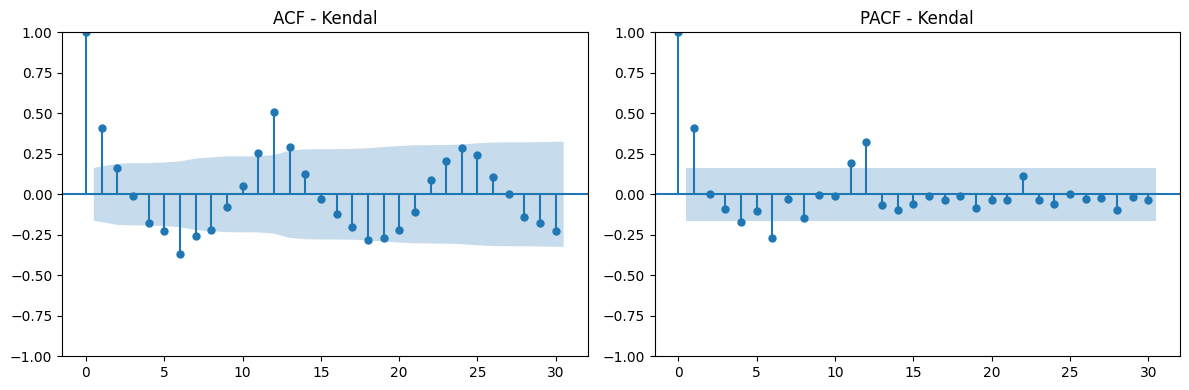

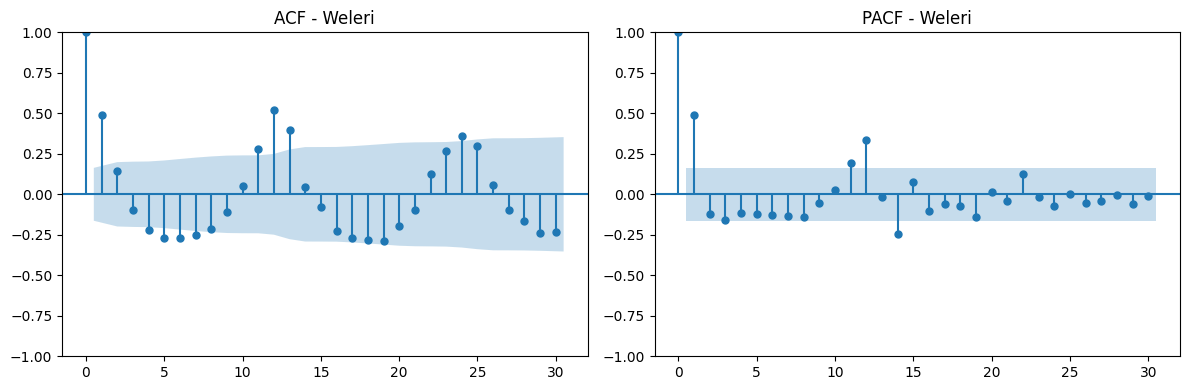

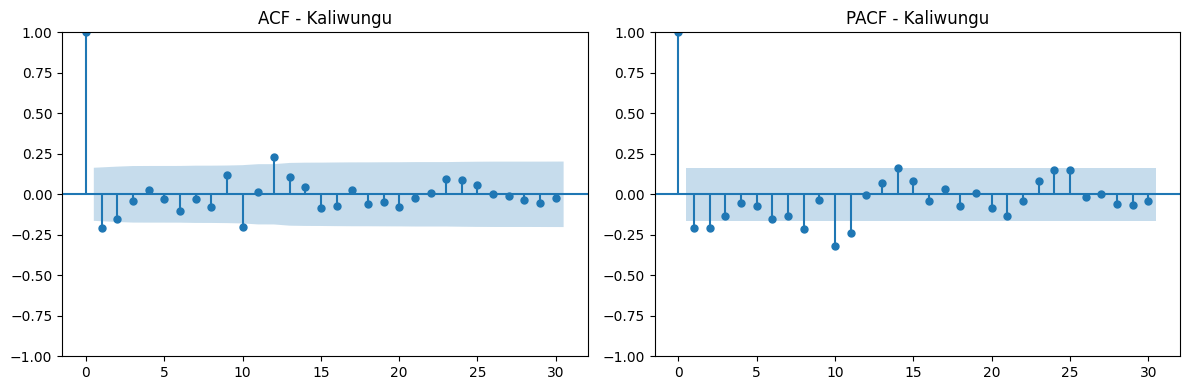

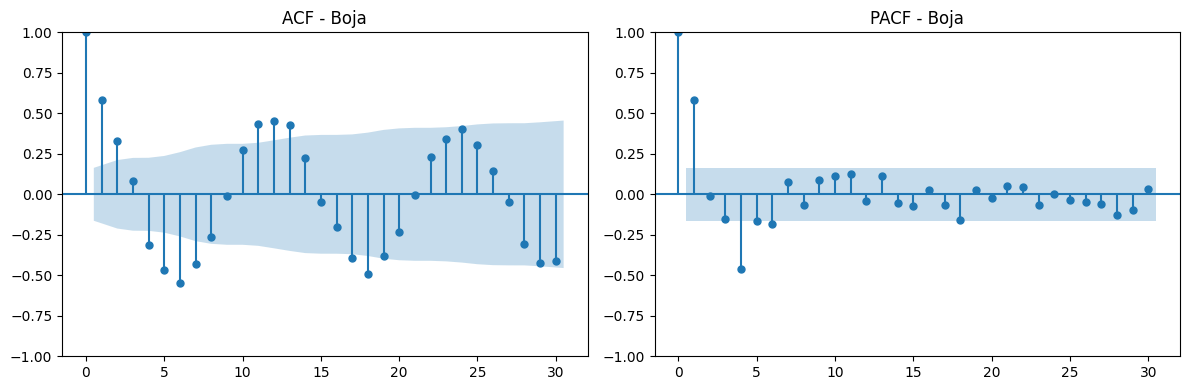

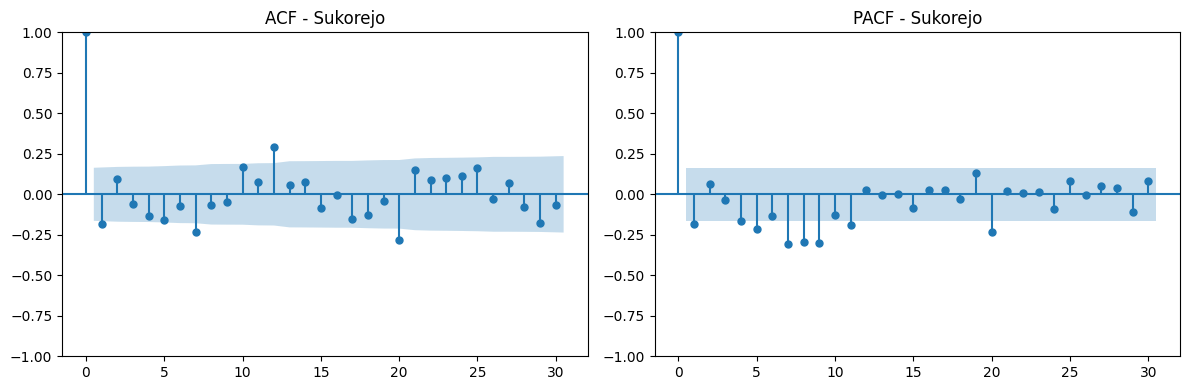

In [50]:
# Pilih data per kota (kalau ada kolom *_diff maka gunakan itu, kalau tidak pakai aslinya)
kota_series = {
    "Kendal": df_bulanan["Kendal"],
    "Weleri": df_bulanan["Weleri"],
    "Kaliwungu": df_bulanan["Kaliwungu_diff"].dropna(),
    "Boja": df_bulanan["Boja"],
    "Sukorejo": df_bulanan["Sukorejo_diff"].dropna()
}

# Plot ACF & PACF untuk tiap kota
for kota, series in kota_series.items():
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    plot_acf(series.dropna(), lags=30, ax=axes[0])
    axes[0].set_title(f"ACF - {kota}")

    plot_pacf(series.dropna(), lags=30, ax=axes[1], method="ywm")
    axes[1].set_title(f"PACF - {kota}")

    plt.tight_layout()
    plt.show()

**Insight :**

1. Kendal : (p=1, d=0, q=1)
2. Weleri : (p=1, d=0, q=1)
3. Kaliwungu : (p=1, d=1, q=1)
4. Boja : (p=1, d=0, q=1)
5. Sukorejo : (p=1, d=1, q=1)


=== Seasonal Decompose: Kendal ===


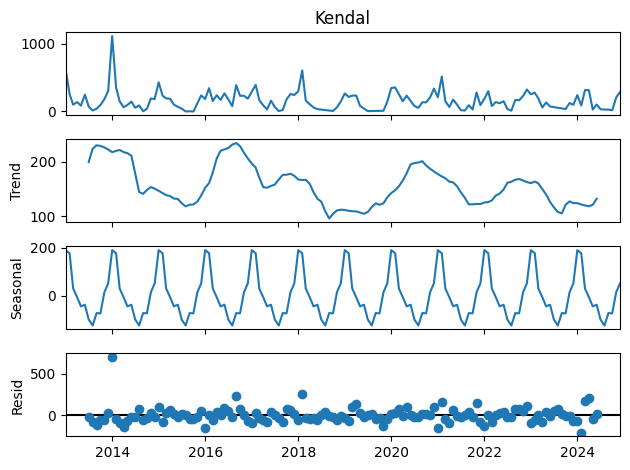


=== Seasonal Decompose: Weleri ===


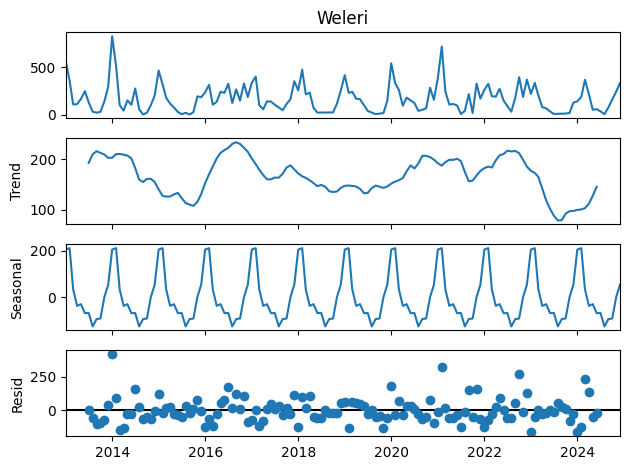


=== Seasonal Decompose: Kaliwungu ===


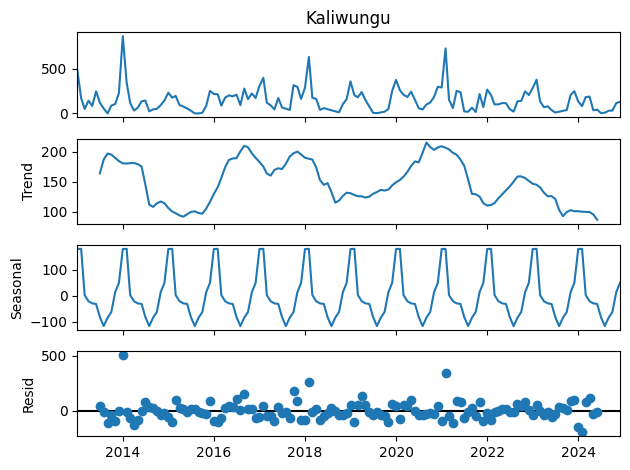


=== Seasonal Decompose: Boja ===


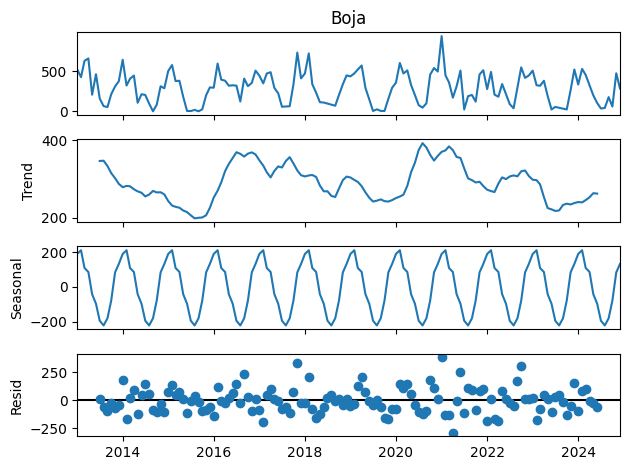


=== Seasonal Decompose: Sukorejo ===


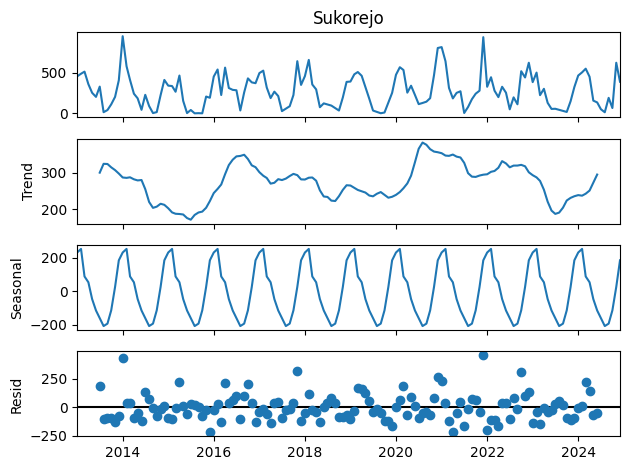

In [51]:
# Loop tiap kota
for kota in ["Kendal", "Weleri", "Kaliwungu", "Boja", "Sukorejo"]:
    print(f"\n=== Seasonal Decompose: {kota} ===")

    # Pakai data asli, karena seasonal_decompose butuh nilai lengkap (bukan differencing)
    series = df_bulanan[kota].dropna()

    # Decompose
    result = seasonal_decompose(series, model="additive", period=12)

    # Plot hasil
    result.plot()
    plt.show()


In [52]:
# Ambil data kota Kendal
kendal_series = df_bulanan["Kendal"]

# Split train-test (2013-2022 = train, 2023-2024 = test)
train_kendal = kendal_series[:'2022']
test_kendal  = kendal_series['2023':]

print("Train Kendal:", train_kendal.shape)
print("Test Kendal :", test_kendal.shape)


Train Kendal: (120,)
Test Kendal : (24,)


In [53]:
# Ambil data kota Weleri
weleri_series = df_bulanan["Weleri"]

# Split train-test (2013-2022 = train, 2023-2024 = test)
train_weleri = weleri_series[:'2022']
test_weleri  = weleri_series['2023':]

print("Train Weleri:", train_weleri.shape)
print("Test Weleri :", test_weleri.shape)


Train Weleri: (120,)
Test Weleri : (24,)


In [54]:
# Ambil data kota Kaliwungu
kaliwungu_series = df_bulanan["Kaliwungu"]

# Split train-test (2013-2022 = train, 2023-2024 = test)
train_kaliwungu = kaliwungu_series[:'2022']
test_kaliwungu = kaliwungu_series['2023':]

print("Train Kaliwungu:", train_kaliwungu.shape)
print("Test Kaliwungu :", test_kaliwungu.shape)


Train Kaliwungu: (120,)
Test Kaliwungu : (24,)


In [55]:
# Ambil data kota Boja
boja_series = df_bulanan["Boja"]

# Split train-test (2013-2022 = train, 2023-2024 = test)
train_boja = boja_series[:'2022']
test_boja = boja_series['2023':]

print("Train Boja:", train_boja.shape)
print("Test Boja :", test_boja.shape)


Train Boja: (120,)
Test Boja : (24,)


In [56]:
# Ambil data kota Sukorejo
sukorejo_series = df_bulanan["Sukorejo"]

# Split train-test (2013-2022 = train, 2023-2024 = test)
train_sukorejo = sukorejo_series[:'2022']
test_sukorejo = sukorejo_series['2023':]

print("Train Sukorejo:", train_sukorejo.shape)
print("Test Sukorejo :", test_sukorejo.shape)

Train Sukorejo: (120,)
Test Sukorejo : (24,)


## **Modelling, Evaluasi, Prediksi dengan Sarima**

**Kota Kendal**

In [57]:
model = SARIMAX(train_kendal,
                order=(1,0,1),
                seasonal_order=(1,0,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)

pred = model_fit.get_prediction(start=test_kendal.index[0],
                                end=test_kendal.index[-1],
                                dynamic=False)
pred_mean = pred.predicted_mean

print("\n=== SARIMA Model Summary ===")
print(model_fit.summary())



=== SARIMA Model Summary ===
                                     SARIMAX Results                                      
Dep. Variable:                             Kendal   No. Observations:                  120
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -637.498
Date:                            Sun, 14 Sep 2025   AIC                           1284.995
Time:                                    10:12:19   BIC                           1298.313
Sample:                                01-01-2013   HQIC                          1290.393
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8855      0.068     13.044      0.000       0.752       1.019
ma.L1

In [58]:
mae = mean_absolute_error(test_kendal, pred_mean)
rmse = np.sqrt(mean_squared_error(test_kendal, pred_mean))
mape = np.mean(np.abs((test_kendal - pred_mean) / test_kendal)) * 100

print("=== Evaluasi Kendal ===")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}")

=== Evaluasi Kendal ===
MAE  : 72.10
RMSE : 95.93
MAPE : 89.41



=== Prediksi Curah Hujan Kendal (2025-2026) ===

              prediksi
2023-01-01  240.884929
2023-02-01  265.935657
2023-03-01  161.032808
2023-04-01  171.717479
2023-05-01  150.040209
2023-06-01  151.676968
2023-07-01   94.457422
2023-08-01   74.930667
2023-09-01  132.246150
2023-10-01  123.628487
2023-11-01  141.688933
2023-12-01  177.664486
2024-01-01  137.417197
2024-02-01  142.499496
2024-03-01   96.738126
2024-04-01   97.180247
2024-05-01   85.256516
2024-06-01   82.936941
2024-07-01   57.679615
2024-08-01   47.630387
2024-09-01   68.238254
2024-10-01   63.005706
2024-11-01   68.533076
2024-12-01   81.330728


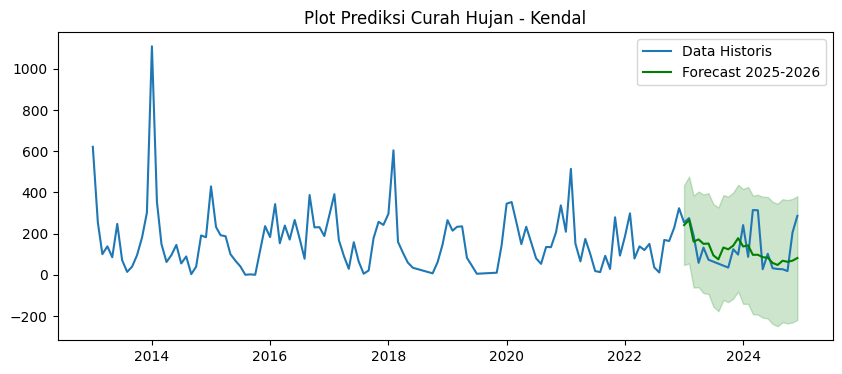

In [59]:
future = model_fit.get_forecast(steps=24)
future_mean = future.predicted_mean
future_ci = future.conf_int()

# Tampilkan tabel hasil prediksi
pred_future = pd.DataFrame({
    "prediksi": future_mean,
})

print("\n=== Prediksi Curah Hujan Kendal (2025-2026) ===\n")
print(pred_future.head(24))

plt.figure(figsize=(10,4))
plt.plot(kendal_series.index, kendal_series, label="Data Historis")
plt.plot(future_mean.index, future_mean, label="Forecast 2025-2026", color="green")
plt.fill_between(future_ci.index,
                 future_ci.iloc[:,0],
                 future_ci.iloc[:,1], color="green", alpha=0.2)
plt.title("Plot Prediksi Curah Hujan - Kendal")
plt.legend()
plt.show()

**Kota Weleri**

In [60]:
model = SARIMAX(train_weleri,
                order=(1,0,1),
                seasonal_order=(1,0,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)

pred = model_fit.get_prediction(start=test_weleri.index[0],
                                end=test_weleri.index[-1],
                                dynamic=False)
pred_mean = pred.predicted_mean

print("\n=== SARIMA Model Summary ===")
print(model_fit.summary())



=== SARIMA Model Summary ===
                                     SARIMAX Results                                      
Dep. Variable:                             Weleri   No. Observations:                  120
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -648.750
Date:                            Sun, 14 Sep 2025   AIC                           1307.499
Time:                                    10:12:21   BIC                           1320.816
Sample:                                01-01-2013   HQIC                          1312.897
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5958      0.260      2.294      0.022       0.087       1.105
ma.L1

In [61]:
mae = mean_absolute_error(test_weleri, pred_mean)
rmse = np.sqrt(mean_squared_error(test_weleri, pred_mean))
mape = np.mean(np.abs((test_weleri - pred_mean) / test_weleri)) * 100

print("=== Evaluasi Weleri ===")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}")

=== Evaluasi Weleri ===
MAE  : 79.35
RMSE : 96.65
MAPE : 239.95



=== Prediksi Curah Hujan Weleri (2025-2026) ===

              prediksi
2023-01-01  373.129395
2023-02-01  347.295326
2023-03-01  166.677626
2023-04-01  113.377507
2023-05-01  130.353258
2023-06-01   97.152085
2023-07-01   75.385063
2023-08-01   32.910792
2023-09-01   69.907698
2023-10-01   77.133978
2023-11-01  140.742786
2023-12-01  170.865088
2024-01-01  289.682137
2024-02-01  289.874546
2024-03-01  134.947788
2024-04-01   93.606032
2024-05-01  114.702383
2024-06-01   86.626214
2024-07-01   68.034999
2024-08-01   29.271628
2024-09-01   64.638926
2024-10-01   71.807598
2024-11-01  131.726448
2024-12-01  160.129590


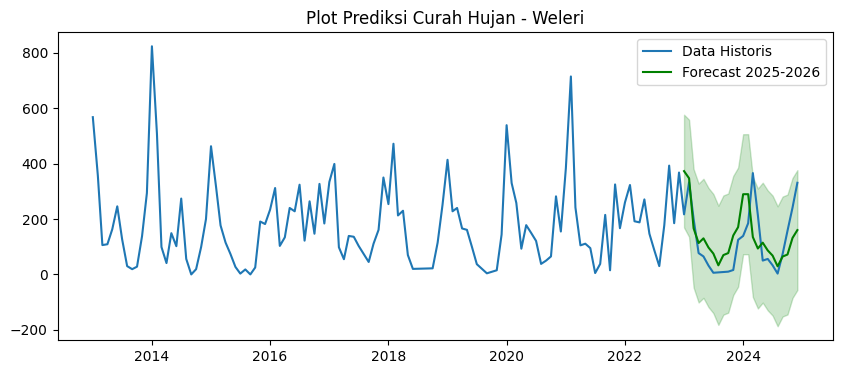

In [62]:
future = model_fit.get_forecast(steps=24)
future_mean = future.predicted_mean
future_ci = future.conf_int()

# Tampilkan tabel hasil prediksi
pred_future = pd.DataFrame({
    "prediksi": future_mean,
})

print("\n=== Prediksi Curah Hujan Weleri (2025-2026) ===\n")
print(pred_future.head(24))

plt.figure(figsize=(10,4))
plt.plot(weleri_series.index, weleri_series, label="Data Historis")
plt.plot(future_mean.index, future_mean, label="Forecast 2025-2026", color="green")
plt.fill_between(future_ci.index,
                 future_ci.iloc[:,0],
                 future_ci.iloc[:,1], color="green", alpha=0.2)
plt.title("Plot Prediksi Curah Hujan - Weleri")
plt.legend()
plt.show()

**Kota Kaliwungu**

In [63]:
model = SARIMAX(train_kaliwungu,
                order=(1,1,1),
                seasonal_order=(1,1,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)

pred = model_fit.get_prediction(start=test_kaliwungu.index[0],
                                end=test_kaliwungu.index[-1],
                                dynamic=False)
pred_mean = pred.predicted_mean

print("\n=== SARIMA Model Summary ===")
print(model_fit.summary())


=== SARIMA Model Summary ===
                                     SARIMAX Results                                      
Dep. Variable:                          Kaliwungu   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -568.614
Date:                            Sun, 14 Sep 2025   AIC                           1147.228
Time:                                    10:12:25   BIC                           1159.891
Sample:                                01-01-2013   HQIC                          1152.341
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0259      0.126     -0.206      0.837      -0.272       0.221
ma.L1

In [64]:
mae = mean_absolute_error(test_kaliwungu, pred_mean)
rmse = np.sqrt(mean_squared_error(test_kaliwungu, pred_mean))
mape = np.mean(np.abs((test_kaliwungu - pred_mean) / test_kaliwungu)) * 100

print("=== Evaluasi Kaliwungu ===")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}")

=== Evaluasi Kaliwungu ===
MAE  : 83.80
RMSE : 104.66
MAPE : 288.49



=== Prediksi Curah Hujan Kaliwungu (2025-2026) ===

              prediksi
2023-01-01  371.372718
2023-02-01  355.484940
2023-03-01  164.249850
2023-04-01  152.000448
2023-05-01  150.681774
2023-06-01  165.228145
2023-07-01   96.364854
2023-08-01   56.374934
2023-09-01   96.012137
2023-10-01  118.449289
2023-11-01  186.997841
2023-12-01  215.347857
2024-01-01  376.501014
2024-02-01  362.979351
2024-03-01  167.494151
2024-04-01  154.655138
2024-05-01  152.550894
2024-06-01  167.893794
2024-07-01   98.892666
2024-08-01   58.325561
2024-09-01   94.334857
2024-10-01  117.563281
2024-11-01  184.308949
2024-12-01  216.045560


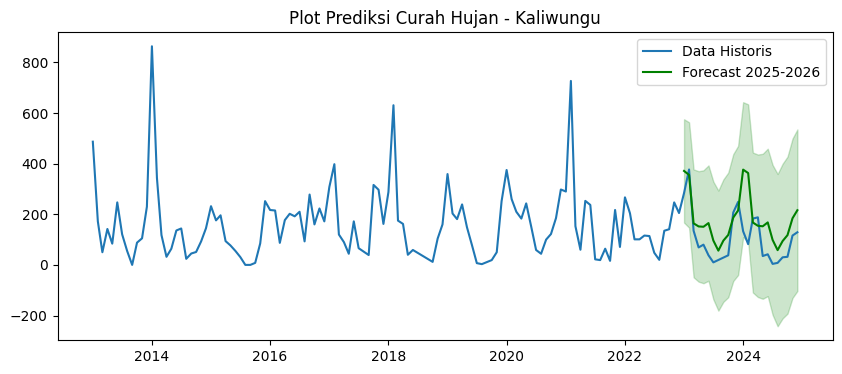

In [65]:
future = model_fit.get_forecast(steps=24)
future_mean = future.predicted_mean
future_ci = future.conf_int()

# Tampilkan tabel hasil prediksi
pred_future = pd.DataFrame({
    "prediksi": future_mean,
})

print("\n=== Prediksi Curah Hujan Kaliwungu (2025-2026) ===\n")
print(pred_future.head(24))

plt.figure(figsize=(10,4))
plt.plot(kaliwungu_series.index, kaliwungu_series, label="Data Historis")
plt.plot(future_mean.index, future_mean, label="Forecast 2025-2026", color="green")
plt.fill_between(future_ci.index,
                 future_ci.iloc[:,0],
                 future_ci.iloc[:,1], color="green", alpha=0.2)
plt.title("Plot Prediksi Curah Hujan - Kaliwungu")
plt.legend()
plt.show()

**Kota Boja**

In [66]:
model = SARIMAX(train_boja,
                order=(1,0,1),
                seasonal_order=(1,0,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)

pred = model_fit.get_prediction(start=test_boja.index[0],
                                end=test_boja.index[-1],
                                dynamic=False)
pred_mean = pred.predicted_mean

print("\n=== SARIMA Model Summary ===")
print(model_fit.summary())


=== SARIMA Model Summary ===
                                     SARIMAX Results                                      
Dep. Variable:                               Boja   No. Observations:                  120
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -679.469
Date:                            Sun, 14 Sep 2025   AIC                           1368.938
Time:                                    10:12:28   BIC                           1382.255
Sample:                                01-01-2013   HQIC                          1374.336
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6038      0.097     -6.217      0.000      -0.794      -0.413
ma.L1

In [67]:
mae = mean_absolute_error(test_boja, pred_mean)
rmse = np.sqrt(mean_squared_error(test_boja, pred_mean))
mape = np.mean(np.abs((test_boja - pred_mean) / test_boja)) * 100

print("=== Evaluasi Boja ===")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}")

=== Evaluasi Boja ===
MAE  : 89.86
RMSE : 106.47
MAPE : 136.66



=== Prediksi Curah Hujan Boja (2025-2026) ===

              prediksi
2023-01-01  521.129132
2023-02-01  469.073576
2023-03-01  425.070082
2023-04-01  384.003336
2023-05-01  253.309193
2023-06-01  235.718753
2023-07-01  102.136836
2023-08-01   72.088318
2023-09-01  121.094802
2023-10-01  229.878890
2023-11-01  378.841331
2023-12-01  404.322150
2024-01-01  484.703137
2024-02-01  489.202199
2024-03-01  411.228847
2024-04-01  390.835291
2024-05-01  248.028323
2024-06-01  237.981844
2024-07-01  100.188074
2024-08-01   72.946477
2024-09-01  120.184549
2024-10-01  229.706904
2024-11-01  377.712345
2024-12-01  403.496126


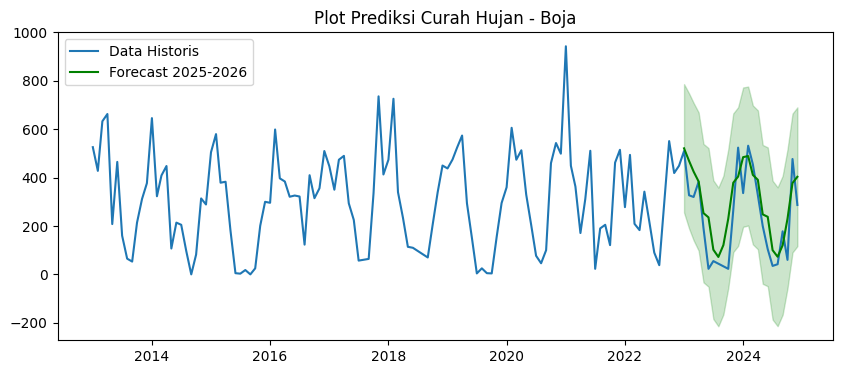

In [68]:
future = model_fit.get_forecast(steps=24)
future_mean = future.predicted_mean
future_ci = future.conf_int()

# Tampilkan tabel hasil prediksi
pred_future = pd.DataFrame({
    "prediksi": future_mean,
})

print("\n=== Prediksi Curah Hujan Boja (2025-2026) ===\n")
print(pred_future.head(24))

plt.figure(figsize=(10,4))
plt.plot(boja_series.index, boja_series, label="Data Historis")
plt.plot(future_mean.index, future_mean, label="Forecast 2025-2026", color="green")
plt.fill_between(future_ci.index,
                 future_ci.iloc[:,0],
                 future_ci.iloc[:,1], color="green", alpha=0.2)
plt.title("Plot Prediksi Curah Hujan - Boja")
plt.legend()
plt.show()

**Kota Sukorejo**

In [69]:
model = SARIMAX(train_sukorejo,
                order=(1,1,1),
                seasonal_order=(1,1,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)

pred = model_fit.get_prediction(start=test_sukorejo.index[0],
                                end=test_sukorejo.index[-1],
                                dynamic=False)
pred_mean = pred.predicted_mean

print("\n=== SARIMA Model Summary ===")
print(model_fit.summary())


=== SARIMA Model Summary ===
                                     SARIMAX Results                                      
Dep. Variable:                           Sukorejo   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -598.879
Date:                            Sun, 14 Sep 2025   AIC                           1207.759
Time:                                    10:12:32   BIC                           1220.422
Sample:                                01-01-2013   HQIC                          1212.872
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3186      0.091      3.519      0.000       0.141       0.496
ma.L1

In [70]:
mae = mean_absolute_error(test_sukorejo, pred_mean)
rmse = np.sqrt(mean_squared_error(test_sukorejo, pred_mean))
mape = np.mean(np.abs((test_sukorejo - pred_mean) / test_sukorejo)) * 100

print("=== Evaluasi Sukorejo ===")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}")

=== Evaluasi Sukorejo ===
MAE  : 146.83
RMSE : 172.81
MAPE : 213.82



=== Prediksi Curah Hujan Sukorejo (2025-2026) ===

              prediksi
2023-01-01  498.693073
2023-02-01  542.995276
2023-03-01  370.214509
2023-04-01  265.057427
2023-05-01  305.404306
2023-06-01  249.383212
2023-07-01   76.847303
2023-08-01  137.904805
2023-09-01  135.136446
2023-10-01  313.049596
2023-11-01  378.137967
2023-12-01  666.871560
2024-01-01  513.523219
2024-02-01  551.710582
2024-03-01  376.726722
2024-04-01  271.260185
2024-05-01  312.806552
2024-06-01  256.428630
2024-07-01   83.347203
2024-08-01  145.821473
2024-09-01  141.687757
2024-10-01  323.380474
2024-11-01  386.113605
2024-12-01  673.061526


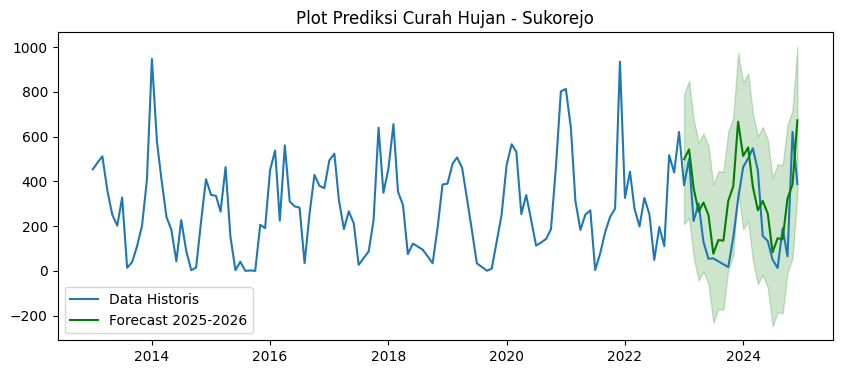

In [71]:
future = model_fit.get_forecast(steps=24)
future_mean = future.predicted_mean
future_ci = future.conf_int()

# Tampilkan tabel hasil prediksi
pred_future = pd.DataFrame({
    "prediksi": future_mean,
})

print("\n=== Prediksi Curah Hujan Sukorejo (2025-2026) ===\n")
print(pred_future.head(24))

plt.figure(figsize=(10,4))
plt.plot(sukorejo_series.index, sukorejo_series, label="Data Historis")
plt.plot(future_mean.index, future_mean, label="Forecast 2025-2026", color="green")
plt.fill_between(future_ci.index,
                 future_ci.iloc[:,0],
                 future_ci.iloc[:,1], color="green", alpha=0.2)
plt.title("Plot Prediksi Curah Hujan - Sukorejo")
plt.legend()
plt.show()